# Install Dependencies and Import Modules

We must build AutoGPTQ from source.

In [ ]:
!pip install transformers accelerate einops sentencepiece

In [ ]:
!git clone https://github.com/PanQiWei/AutoGPTQ
!pip install ./AutoGPTQ/

In [3]:
import torch
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM

# Load the Model and Tokenizer

This may take a while. It also requires around 3.5GB of RAM and 7.5GB of GPU. It will use 28 GB of disk space.

In [4]:
model_path = "TheBloke/falcon-40b-instruct-GPTQ"

In [5]:
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=False)

In [6]:
model = AutoGPTQForCausalLM.from_quantized(model_path, device="cuda:0", use_triton=False, use_safetensors=True, torch_dtype=torch.float32, trust_remote_code=True)

A new version of the following files was downloaded from https://huggingface.co/TheBloke/falcon-40b-instruct-GPTQ:
- configuration_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/TheBloke/falcon-40b-instruct-GPTQ:
- modelling_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


# Your Prompt

You only need to change the prompt below.

In [7]:
prompt = "Describe a painting of a falcon hunting a llama in a very detailed way." #@param
prompt_template = f"### Instruction: {prompt}\n### Response:"

This will generate the output:

In [8]:
tokens = tokenizer(prompt_template, return_tensors="pt").input_ids.to("cuda:0")
output = model.generate(input_ids=tokens, max_new_tokens=256, do_sample=True, temperature=0.8)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


In [9]:
# Print the generated text
print(tokenizer.decode(output[0]))

### Instruction: Describe a painting of a falcon hunting a llama in a very detailed way.
### Response: The painting depicts a breathtaking scene of a majestic falcon soaring through the sky, its wings stretched out to catch the wind. It is in pursuit of its prey, a graceful llama grazing on the lush green hills of the Andes Mountains. The falcon swoops down, its razor-sharp talons extended, as the startled llama bolts away. The painting captures the intensity and beauty of the hunt, with the snowcapped peaks of the Andean peaks as the backdrop, adding to the grandeur of the scene.<|endoftext|>


This model runs very slowly for inference. And it's also resource intensive.

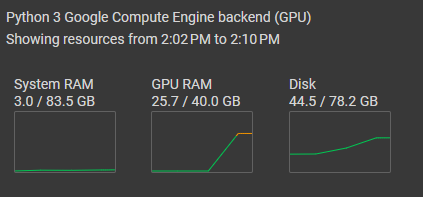